In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'SimHei'

In [2]:
# 加载 Iris 数据集
iris = datasets.load_iris()
X = iris.data  # 特征矩阵
y = iris.target  # 目标向量
class_names = iris.target_names  # 类别名称
n_classes = len(class_names)

In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"模型：{model_name}")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [5]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('预测值')
    plt.ylabel('真实值')
    # plt.title(f"{model_name} - 混淆矩阵")
    plt.savefig(f'img/iris/{model_name}_confusion_matrix.png')
    plt.show()

In [6]:
def plot_roc_curve(y_true, y_score, model_name):
    # 独热编码
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # 微平均 ROC 曲线
    fpr["micro"], tpr["micro"], _ = roc_curve(
        y_true_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC 曲线 (AUC = {0:0.2f})'.format(
                 roc_auc["micro"]), linewidth=2)

    # 绘制每个类别的 ROC 曲线
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=2,
                 label='{0} ROC 曲线 (AUC = {1:0.2f})'.format(
                     class_names[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳性率')
    plt.ylabel('真正率')
    # plt.title(f'{model_name} - ROC 曲线')
    plt.savefig(f'img/iris/{model_name}_roc_curve.png')
    plt.legend(loc="lower right")
    plt.show()

In [7]:
# 定义模型配置
models = [
    {'name': '线性可分 SVM', 'params': {'kernel': 'linear', 'C': 1e10, 'probability': True}},
    {'name': '线性 SVM', 'params': {'kernel': 'linear', 'C': 1.0, 'probability': True}},
    {'name': '2 次多项式核 SVM', 'params': {'kernel': 'poly', 'degree': 2, 'gamma': 'auto', 'probability': True}},
    {'name': '3 次多项式核 SVM', 'params': {'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'probability': True}},
    {'name': '高斯核 SVM', 'params': {'kernel': 'rbf', 'gamma': 'scale', 'probability': True}},
    {'name': 'Sigmoid 核 SVM', 'params': {'kernel': 'sigmoid', 'gamma': 'auto', 'probability': True}}
]

In [8]:
from sklearn.metrics.pairwise import laplacian_kernel

# 定义拉普拉斯核 SVM 模型配置
laplacian_model = {'name': '拉普拉斯核 SVM', 'params': {'kernel': 'precomputed', 'probability': True}}



模型：线性可分 SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



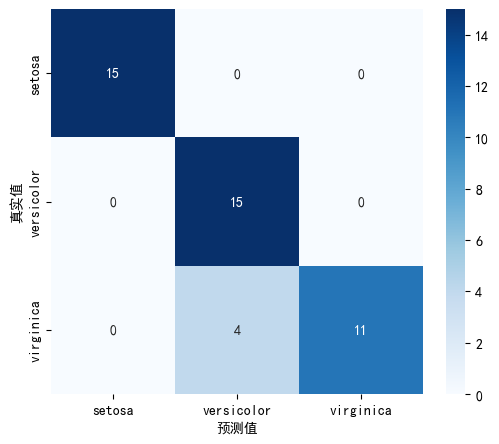

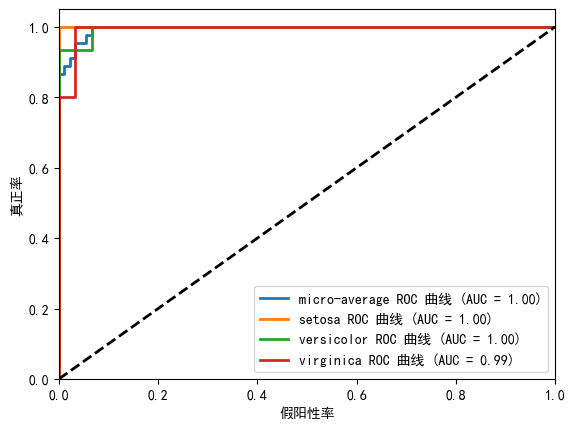



模型：线性 SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



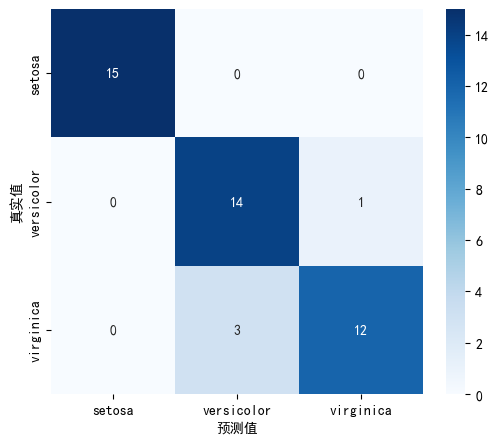

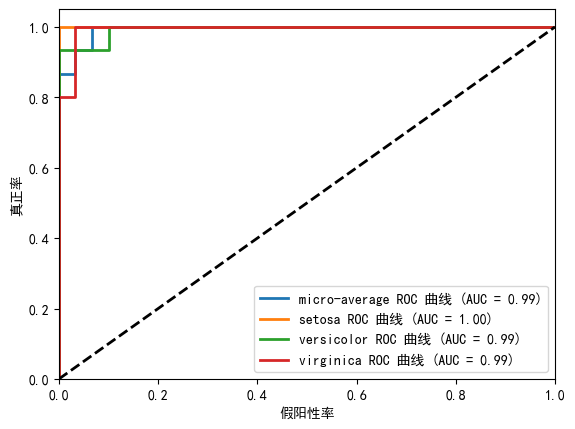



模型：2 次多项式核 SVM
              precision    recall  f1-score   support

      setosa       0.88      0.93      0.90        15
  versicolor       0.75      1.00      0.86        15
   virginica       0.89      0.53      0.67        15

    accuracy                           0.82        45
   macro avg       0.84      0.82      0.81        45
weighted avg       0.84      0.82      0.81        45



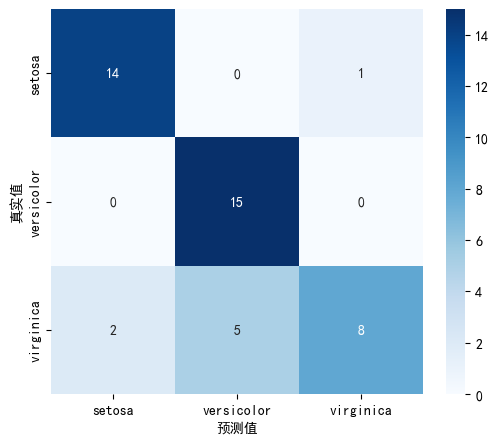

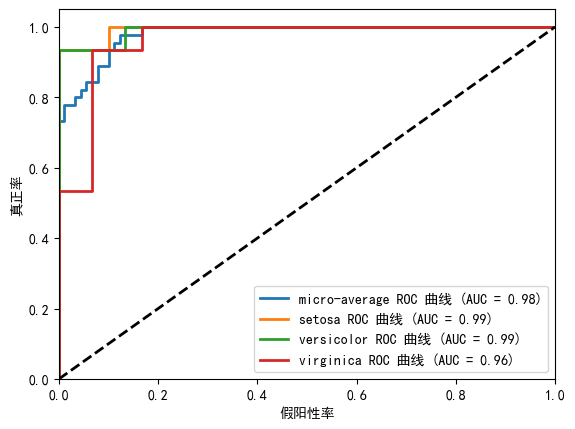



模型：3 次多项式核 SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.71      1.00      0.83        15
   virginica       1.00      0.60      0.75        15

    accuracy                           0.87        45
   macro avg       0.90      0.87      0.86        45
weighted avg       0.90      0.87      0.86        45



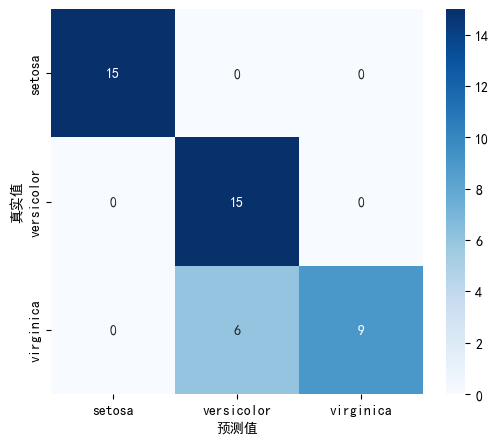

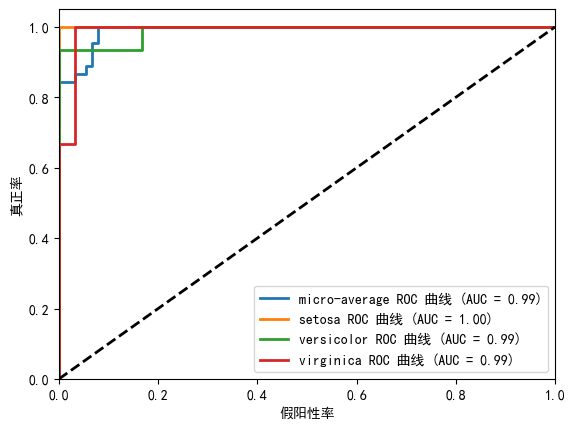



模型：高斯核 SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



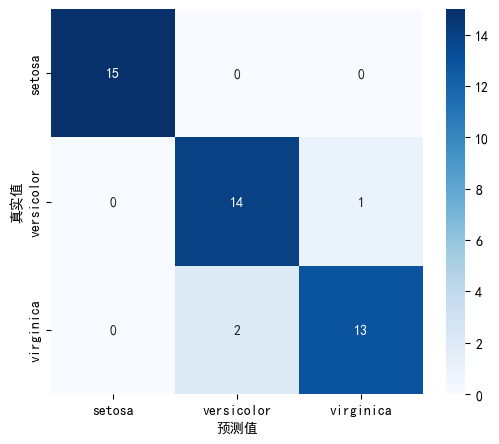

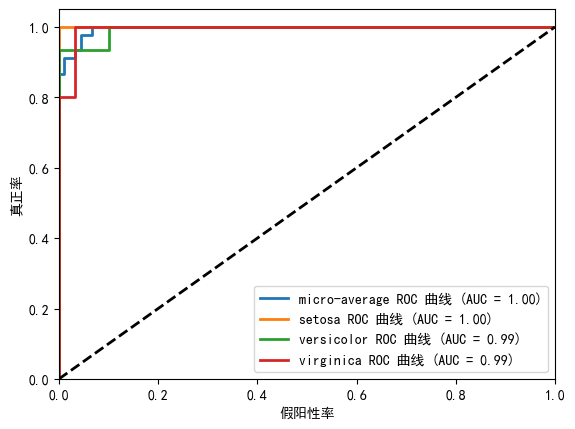



模型：Sigmoid 核 SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.80      0.86        15
   virginica       0.82      0.93      0.88        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



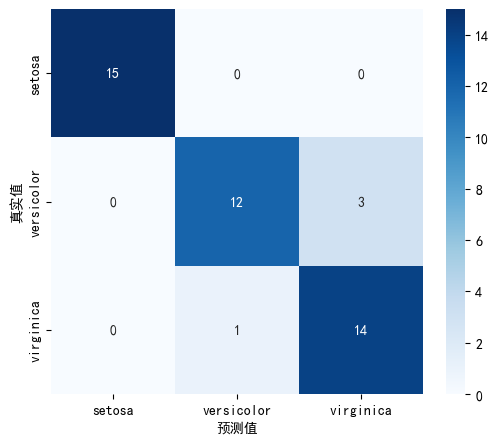

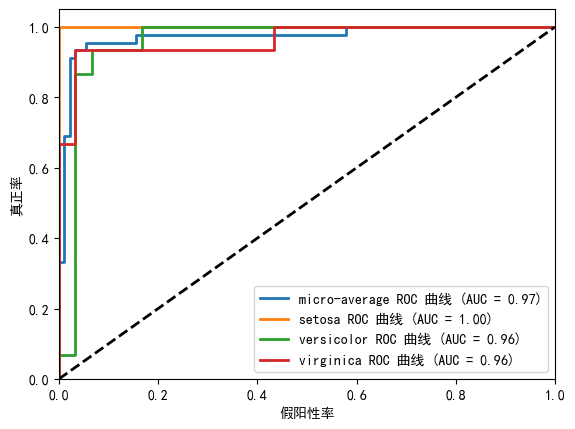

In [9]:
for model in models:
    model_name = model['name']
    params = model['params']
    print(f"\n{'='*60}\n")

    svc = SVC(**params)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_score = svc.predict_proba(X_test)

    # 评估模型
    evaluate_model(y_test, y_pred, model_name)
    plot_confusion_matrix(y_test, y_pred, model_name)
    plot_roc_curve(y_test, y_score, model_name)



模型：拉普拉斯核 SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



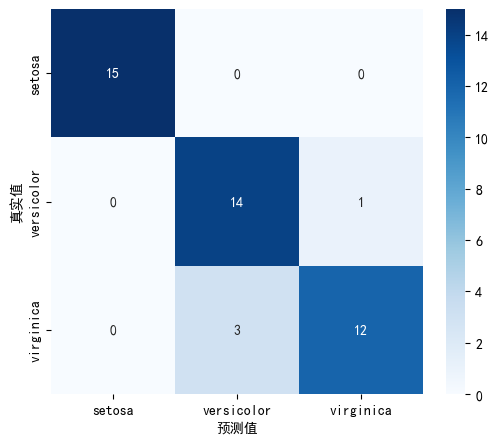

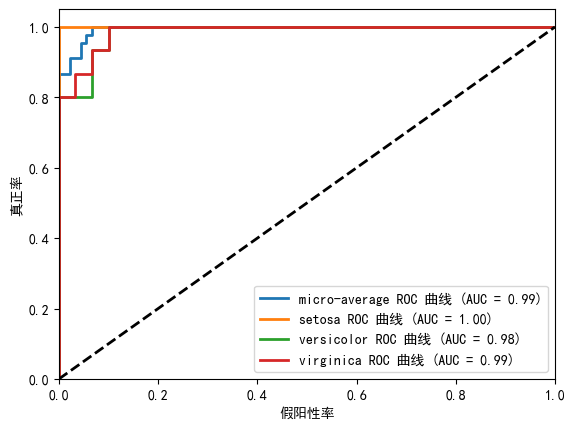

In [10]:
# 训练和评估拉普拉斯核 SVM
print(f"\n{'='*60}\n")

# 计算拉普拉斯核矩阵
gamma = 1.0
K_train = laplacian_kernel(X_train, X_train, gamma=gamma)
K_test = laplacian_kernel(X_test, X_train, gamma=gamma)

svc = SVC(kernel='precomputed', probability=True)
svc.fit(K_train, y_train)
y_pred = svc.predict(K_test)
y_score = svc.predict_proba(K_test)

# 评估模型
evaluate_model(y_test, y_pred, '拉普拉斯核 SVM')
plot_confusion_matrix(y_test, y_pred, '拉普拉斯核 SVM')
plot_roc_curve(y_test, y_score, '拉普拉斯核 SVM')